<a href="https://colab.research.google.com/github/luanakwon/GreatBarrierReef/blob/main/Kaggle_GreatBarrierReef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset from kaggle api
kaggle  
https://www.kaggle.com/c/tensorflow-great-barrier-reef/data  

kaggle API usage  
https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb

In [ ]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=ce9d0d65b48d4bf31df8e8aa2a11be0ec4e2c05d241ef88759f77aa17508186f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle competitions download -c tensorflow-great-barrier-reef

100% 14.2G/14.2G [01:58<00:00, 120MB/s]
100% 14.2G/14.2G [01:58<00:00, 129MB/s]


In [ ]:
!unzip /content/tensorflow-great-barrier-reef.zip 

# Session1

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd


In [ ]:
tr = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


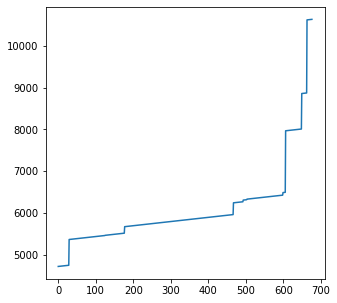

In [ ]:
a = tr[tr['annotations'] != '[]']
b = a[tr['video_id'] == 2]
c = np.array(b['video_frame'])

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(c)
plt.show()

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('video_0.mp4',fourcc,15,(640,360))

# for dirname, _, filenames in os.walk('/content/train_images/video_0'):
#     for i, filename in enumerate(filenames):
#       print(f'{os.path.join(dirname, filename)}')
#       #img = cv2.imread(f'{os.path.join(dirname, filename)}')
#       #cv2_imshow(img)

total = len(tr[tr['video_id'] == 0])
total = 3000
for i in range(0,total,2):
  print(f'\r{i}/{total}',end='\t')
  img = cv2.imread(f'/content/train_images/video_0/{i}.jpg')
  if img is not None:
    out.write(cv2.resize(img,(640,360)))

out.release()

2998/3000	

In [ ]:
'''
parameters
folder_path : ex) /content/train_images/
df_label : pd.read_csv('/content/train_csv')
'''
class GBRDataset(dsets):
  def __init__(self, folder_path, df_label):
    self.fp = folder_path
    self.dfl = df_label

  def __len__(self):
    return len(self.dfl)
  
  def __getitem__(self, idx):
    if torch.is_tesor(idx):
      idx = idx.tolist()

    video_id = self.dfl['video_id'][idx]
    video_frame = self.dfl['video_frame'][idx]

    # yolov5 autoshape allows image input as list of filenames
    # https://github.com/ultralytics/yolov5/issues/36#:~:text=For%20all%20inference%20options%20see%20YOLOv5%20AutoShape()%20forward%20method%3A
    img = f'{self.fp}video_{video_id}/{video_frame}.jpg'
    label = self.annotation2Tensor(self.dfl['annotations'][idx])

    return img, label

  def annotation2Tensor(self,ann):
    # TODO convert string annotation to tensor of shape (??)
    return torch.zeros(1)

In [2]:
%%bash
pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5s',pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-1-30 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


<class 'list'>
https://ultralytics.com/images/zidane.jpg
